# Proyek Analisis Data: Bike Sharing Dataser
- **Nama:** Fahira Adindiah
- **Email:** m010d4kx1699@bangkit.academy
- **ID Dicoding:** Fahira Adindiah M010D4KX1699

## Menentukan Pertanyaan Bisnis

- Musim dengan jumlah sewa tertinggi
- Hari dengan jumlah sewa tertinggi

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

In [6]:
df_day = pd.read_csv("/day.csv")
df_hour = pd.read_csv("/hour.csv")

### Assessing Data

In [8]:
print("Jumlah null values dalam dataset day")
print(df_day.isnull().sum())

Jumlah null values dalam dataset
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print("Jumlah null values dalam dataset hour")
print(df_hour.isnull().sum())

Jumlah null values dalam dataset hour
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
print("Jumlah data duplikat dalam dataset day")
print(df_day.duplicated().sum())

Jumlah data duplikat dalam dataset day
0


In [12]:
print("Jumlah data duplikat dalam dataset hour")
print(df_hour.duplicated().sum())

Jumlah data duplikat dalam dataset hour
0


In [13]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers)

In [14]:
numeric_columns_hour = df_hour.select_dtypes(include=np.number).columns
numeric_columns_day = df_day.select_dtypes(include=np.number).columns

In [16]:
hour_outliers_count = {}
for col in numeric_columns_hour:
    outliers_count = find_outliers(df_hour[col])
    hour_outliers_count[col] = outliers_count

day_outliers_count = {}
for col in numeric_columns_day:
    outliers_count = find_outliers(df_day[col])
    day_outliers_count[col] = outliers_count

print("Jumlah data outlier di dataset hour:", hour_outliers_count)
print("Jumlah data outlier di dataset day:", day_outliers_count)

Jumlah data outlier di dataset hour: {'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}
Jumlah data outlier di dataset day: {'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


### Cleaning Data

In [17]:
import numpy as np

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data

def drop_outliers_per_column(df):
    numeric_columns = df.select_dtypes(include=np.number).columns
    cleaned_df = df.copy()
    for col in numeric_columns:
        cleaned_df = cleaned_df.loc[remove_outliers(cleaned_df[col]).index]
    return cleaned_df

cleaned_df_hour = drop_outliers_per_column(df_hour)
cleaned_df_day = drop_outliers_per_column(df_day)

## Exploratory Data Analysis (EDA)

In [20]:
cleaned_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14534 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14534 non-null  int64  
 1   dteday      14534 non-null  object 
 2   season      14534 non-null  int64  
 3   yr          14534 non-null  int64  
 4   mnth        14534 non-null  int64  
 5   hr          14534 non-null  int64  
 6   holiday     14534 non-null  int64  
 7   weekday     14534 non-null  int64  
 8   workingday  14534 non-null  int64  
 9   weathersit  14534 non-null  int64  
 10  temp        14534 non-null  float64
 11  atemp       14534 non-null  float64
 12  hum         14534 non-null  float64
 13  windspeed   14534 non-null  float64
 14  casual      14534 non-null  int64  
 15  registered  14534 non-null  int64  
 16  cnt         14534 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.0+ MB


In [21]:
cleaned_df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     655 non-null    int64  
 1   dteday      655 non-null    object 
 2   season      655 non-null    int64  
 3   yr          655 non-null    int64  
 4   mnth        655 non-null    int64  
 5   holiday     655 non-null    int64  
 6   weekday     655 non-null    int64  
 7   workingday  655 non-null    int64  
 8   weathersit  655 non-null    int64  
 9   temp        655 non-null    float64
 10  atemp       655 non-null    float64
 11  hum         655 non-null    float64
 12  windspeed   655 non-null    float64
 13  casual      655 non-null    int64  
 14  registered  655 non-null    int64  
 15  cnt         655 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.0+ KB


In [22]:
cleaned_df_day.groupby(by="season").cnt.count()

season
1    164
2    158
3    170
4    163
Name: cnt, dtype: int64

In [23]:
cleaned_df_day.groupby(by="weekday").cnt.count()

weekday
0     87
1     87
2    102
3    102
4     99
5    100
6     78
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim dengan jumlah sewa harian tertinggi

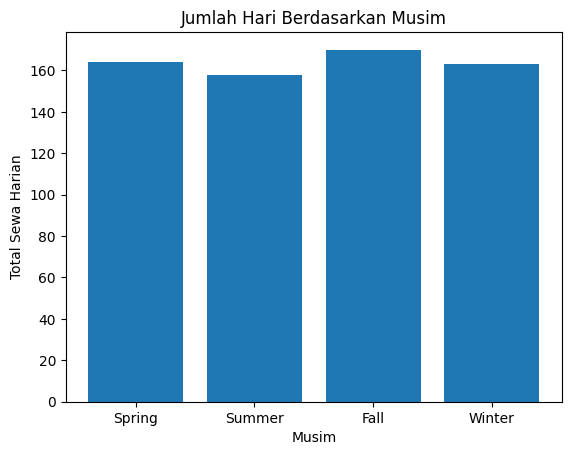

In [25]:
import matplotlib.pyplot as plt

season_counts = cleaned_df_day.groupby(by="season").cnt.count()
season_counts.index = season_counts.index.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

plt.bar(season_counts.index, season_counts)

plt.title('Jumlah Hari Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Sewa Harian')

plt.show()

### Pertanyaan 2: Hari dengan jumlah sewa tertinggi

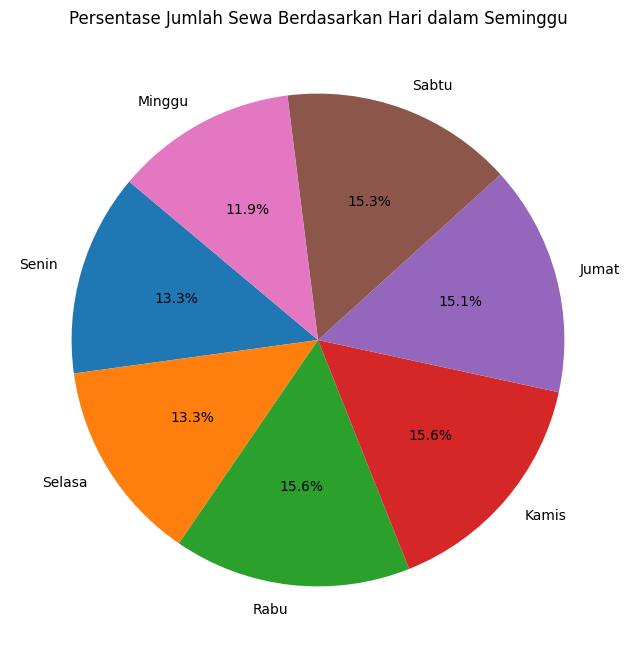

In [26]:
weekday_counts = cleaned_df_day.groupby(by="weekday").cnt.count()

plt.figure(figsize=(8, 8))
weekday_counts.index = weekday_counts.index.map({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Persentase Jumlah Sewa Berdasarkan Hari dalam Seminggu')
plt.show()

## Conclusion

- Jumlah sewa harian tertinggi terjadi pada musim Fall (gugur)
- Jumlah sewa harian tertinggi terjadi pada Kamis atau Rabu